# Desafio - Data Science

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Leitura dos Dados

In [2]:
path = os.path.join('data', 'bank-full.csv')
data = pd.read_csv(path, sep=';')
print(data.shape)
data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Transfomação dos Dados

In [3]:
# transformando em 0s e 1s
print(data.housing.value_counts())
fl_housing = data['housing'] == 'yes'
data.loc[~fl_housing, 'housing'] = 0
data.loc[fl_housing, 'housing'] = 1
print(data.housing.value_counts())

yes    25130
no     20081
Name: housing, dtype: int64
1    25130
0    20081
Name: housing, dtype: int64


In [4]:
# transformanto em 0s e 1s
print(data.loan.value_counts())
fl_loan = data['loan'] == 'yes'
data.loc[~fl_loan, 'loan'] = 0
data.loc[fl_loan, 'loan'] = 1
print(data.loan.value_counts())

no     37967
yes     7244
Name: loan, dtype: int64
0    37967
1     7244
Name: loan, dtype: int64


In [5]:
# Criando uma flag de empréstimo, caso a pessoa possua algum tipo de empréstimo.
fl_empr = (data['loan'] == 1) | (data['housing'] == 1)
data['emprestimo'] = fl_empr.astype(int)
print(data.emprestimo.value_counts())

1    28007
0    17204
Name: emprestimo, dtype: int64


In [6]:
# transformando em 0s e 1s
print(data['y'].value_counts())
fl_success = data['y'] == 'yes'
data.loc[~fl_success, 'y'] = 0
data.loc[fl_success, 'y'] = 1
print(data['y'].value_counts())

no     39922
yes     5289
Name: y, dtype: int64
0    39922
1     5289
Name: y, dtype: int64


# Questão 1
Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

### Desenvolvimento

Primeiramente, são geradas as informações necessárias para responder a questão. Os dados gerados correspondem à valores sumarizados por profissão (_p_):
- **freq_abs:** número absoluto de pessoas com a profissão _p_;
- **freq_relativa:** porcentagem de pessoas com a profissão _p_;
- **housing_abs:** número de pessoas com a profissão _p_ que possuem empréstimo imobiliário;
- **housing_rel:** porcentagem de pessoas com a profissão _p_ que possuem empréstimo imobiliário;
- **loan_abs:** número de pessoas com a profissão _p_ que possuem empréstimo pessoal;
- **loan_rel:** porcentagem de pessoas com a profissão _p_ que possuem empréstimo pessoal;
- **empr_abs:** número de pessoas com a profissão _p_ e que possuem algum tipo de empréstimo;
- **empr_rel:** porcentagem de pessoas com a profissão _p_ e que possuem algum tipo de empréstimo;

In [7]:
agg = data.groupby('job')
index = list(agg.groups.keys())

jobs_df = pd.DataFrame({
    'freq_abs': agg['job'].count()[index],
    'freq_rel': agg['job'].count()[index] / len(data),
    'housing_abs': agg['housing'].sum()[index],
    'housing_rel': agg['housing'].mean()[index],
    'loan_abs': agg['loan'].sum()[index],
    'loan_rel': agg['loan'].mean()[index],
    'empr_abs': agg['emprestimo'].sum()[index],
    'empr_rel': agg['emprestimo'].mean()[index]},
    index = index
).sort_values('freq_abs',ascending=False)

jobs_df

,freq_abs,freq_rel,housing_abs,housing_rel,loan_abs,loan_rel,empr_abs,empr_rel
blue-collar,9732,0.215257,7048,0.724209,1684,0.173037,7599,0.780826
management,9458,0.209197,4678,0.494608,1253,0.132480,5225,0.552442
technician,7597,0.168034,4115,0.541661,1309,0.172305,4608,0.606555
admin.,5171,0.114375,3182,0.615355,991,0.191646,3569,0.690195
services,4154,0.091880,2766,0.665864,836,0.201252,3063,0.737362
retired,2264,0.050076,491,0.216873,309,0.136484,699,0.308746
self-employed,1579,0.034925,765,0.484484,229,0.145028,864,0.547182
entrepreneur,1487,0.032890,869,0.584398,356,0.239408,1016,0.683255
unemployed,1303,0.028820,543,0.416731,109,0.083653,589,0.452034
housemaid,1240,0.027427,398,0.320968,152,0.122581,490,0.395161


### Resposta 1
De forma resumida:

> **_blue-collar_** é profissão que tem maior tendência ao empréstimos. Principalmente, empréstimos imobibliários.


A seguir, uma resposta mais elaborada:

Para responder qual a profissão tem mais tendência a fazer um epréstimo, podemos ver qual a profissão possui o maior número de empréstimos. Neste case, estamos considerando qualquer tipo de empréstimo (imobiliário ou pessoal). Desta forma obtemos a listagem a seguir, com os respectivos valores absolutos.

In [8]:
jobs_df['empr_abs'].sort_values(ascending=False)

blue-collar      7599
management       5225
technician       4608
admin.           3569
services         3063
entrepreneur     1016
self-employed     864
retired           699
unemployed        589
housemaid         490
student           257
unknown            28
Name: empr_abs, dtype: int64

Porém, o caso acima é influenciado pelo volume de pessoas em cada profissão. Para removermos esse viéz, podemos ver a frequência relativa, dentro de cada profissão.

In [9]:
jobs_df['empr_rel'].sort_values(ascending=False)

blue-collar      0.780826
services         0.737362
admin.           0.690195
entrepreneur     0.683255
technician       0.606555
management       0.552442
self-employed    0.547182
unemployed       0.452034
housemaid        0.395161
retired          0.308746
student          0.273987
unknown          0.097222
Name: empr_rel, dtype: float64

Nesta segunda listagem, podemos ver que profissionais de serviços (_service_), apesar de possuir poucos empréstimos (3063) eles correspondem a 73.73% deste sub-público, tornando uma profissão com alta tendência à contratação. Se comparado com _management_, o alto número de empréstimos (5225) corresponde a apenas 55,24% do público. Isso se dá pelo grande volume deste sub-público.

Para analisarmos o tipo de empréstimo que é mais comum, vamos comparar as frequências relativas de cada tipo. Desta forma temos que, em todos os casos, a **frequência de empréstimos imobiliários é maior**:

In [10]:
# Verdadeiro quando a taxa de empréstimos imobiliários é maior que empréstimo pessoal
jobs_df.housing_rel > jobs_df.loan_rel

blue-collar      True
management       True
technician       True
admin.           True
services         True
retired          True
self-employed    True
entrepreneur     True
unemployed       True
housemaid        True
student          True
unknown          True
dtype: bool

# Questão 2

Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

### Desenvolvimento

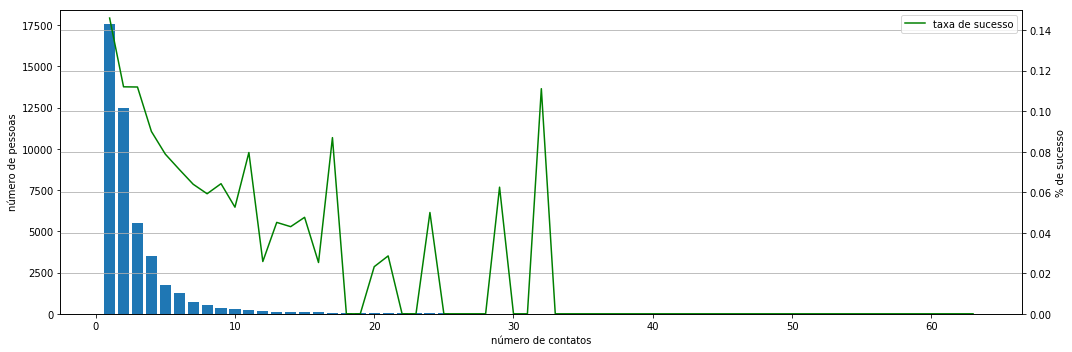

In [11]:
agg_camp = data.groupby('campaign')
values = agg_camp['y'].describe()

fig, ax1 = plt.subplots(figsize=(15,5))
ax1.bar(values.index, values['count'], label='pessoas')
ax1.set_xlabel('número de contatos')
ax1.set_ylabel('número de pessoas')

ax2 = ax1.twinx()
ax2.plot(values.index, values['mean'], label='taxa de sucesso', color='green')
ax2.set_ylabel('% de sucesso')
ax2.set_ylim(0, .15)
ax2.grid()

plt.legend()
plt.tight_layout()
plt.show()

### Resposta 2

Com base no gráfico acima, é possível perceber que quanto maior o número de contatos, menor é taxa de sucesso. Vale ressaltar que os picos apresentados para contatos maiores que 10 são decorrentes do baixo volume destes casos.

# Questão 3

Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

### Desenvolvimento

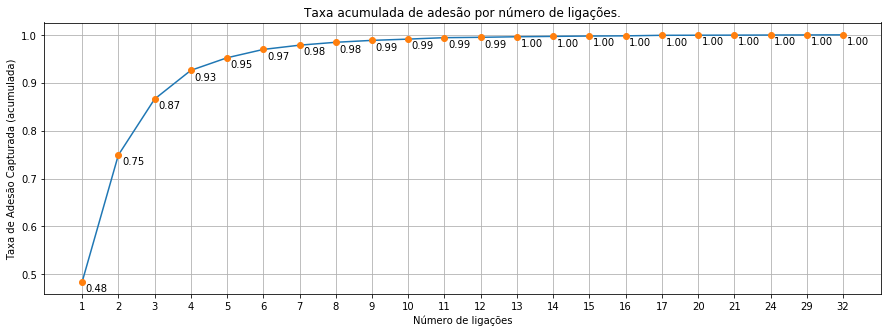

In [12]:
# selecionado apenas as adesões
fl_adesao = data['y'] == 1

# número de contatos para quem aderiu
contatos_df = data.loc[fl_adesao, 'campaign']

# porcentagem das adesões por número de contatos
adesao_df = contatos_df.value_counts()  / len(contatos_df)
adesao_df = adesao_df.sort_index()

# taxa acumulada de adesão por contato
adesao_cum = adesao_df.cumsum()

# gráfico
plt.figure(figsize=(15,5))
plt.plot(range(len(adesao_cum)), adesao_cum.values)
plt.plot(range(len(adesao_cum)), adesao_cum.values, 'o')
plt.xticks(ticks=range(len(adesao_cum)), labels=adesao_cum.index)
plt.title('Taxa acumulada de adesão por número de ligações.')
plt.xlabel('Número de ligações')
plt.ylabel('Taxa de Adesão Capturada (acumulada)')
plt.grid()

for i, j in zip(range(len(adesao_cum)), adesao_cum.values):
    plt.annotate(f'{j:.2f}', (i+.1, j-.02))

plt.show()

O gráfico acima descreve o quanto das adesões são capturadas com determinado número de ligações. O eixo x possui o número de ligações (contatos) e o eixo y representa, de forma acumulada, a taxa de adesão capturada.

Com apenas 1 contato, é possível capturar 48% das a desões. Com 2 contatos, 75% das adesões. Vale ressaltar que os valores mostrados ao lado de cada ponto são aproximados, por isso os valores acima de 13 contatos apresentam uma captura de 100% das adesões.

### Resposta 3

O número máximo para captura máxima de adesões é 32. Porém, poucas adesões necessitaram de tantos contatos. Com apenas 5 ligações foram capturadas 95% das adesões, o que parece ser um número razoável de contatos.

# Questão 4

O resultado da campanha anterior tem relevância na campanha atual?

### Desenvolvimento

In [13]:
# número de adesões no campanha atual (5289)
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [14]:
# número de adesões dada a campanha anterior
values = data.groupby('poutcome')['y'].describe()[['count', 'mean']]
values['sum'] = values['count'] * values['mean']
values.columns = ['total', 'taxa de sucesso', 'num de sucesso']
values

,total,taxa de sucesso,num de sucesso
poutcome,,,
failure,4901.0,0.126097,618.0
other,1840.0,0.166848,307.0
success,1511.0,0.647253,978.0
unknown,36959.0,0.091615,3386.0


A tabela acima, as linhas representam a saída da campanha anterior e colunas são descritas como:
- **total**: é o numero de pessoas em cada tipo de saída da campanha anterior;
- **taxa de sucesso**: é a porcentagem de pessoas que obtiveram sucesso na segunda campanha;
- **num de sucesso**: é o valor absoluto de sucesso na segunda campanha.

### Resposta 4

Sim. Dado que a campanha tenha sido um sucesso anteriormente, há uma taxa de 64% de sucesso na campanha atual, diferente dos outros casos, com menos de 16% de sucesso. Vale ressaltar que, embora proporcionalmente menor (9%), casos desconhecidos (_unknown_) na campanha anterior, representa o maior volume (3386) de sucesso na campanha atual.

# Questão 5

Qual o fator determinante para que o banco exija um seguro de crédito?

Fiquei confuso com essa questão, pois não encontrei uma variável relacionada a **seguro de crédito**. Das variáveis de crédito disponíveis na base de dados, estão:
- default: variável que indica se a pessoa entrou/está em atraso ou não em algum produto de crédito.
- balance: balanço anual médio (em euros).
- housing: variável que indica se a pessoa possui empréstimo imobiliário.
- loan: variável que indica se a pessoa possui empréstimo pessoal.

# Questão 6

Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

### Desenvolvimento

Para identificar as características mais importantes de um cliente com empréstimo imobiliário, será construída uma regressão logística. A identificação será dada pelo peso dos coeficientes de cada variável na equação.

Primeiramente, serão selecionadas apenas as variáveis adequadas para o problema. Sendo assim, as variáveis de informações dos clientes serão utilizadas, descartando variáveis relacionadas com a campanha de marketing. Neste caso, a variável reposta será dada por _housing_.

Em seguida, é necessário tratar os dados para que os coeficientes da regressão logística reflitam um grau de importância. Para isso, os dados serão transformados em numéricos e normalizados.

In [15]:
# seleção das variáveis.
y = data['housing']
x = data[[
    'age',
    'job',
    'marital',
    'education',
    'default',
    'balance',
    'loan'
]].copy()

# tratamento da variável default para numérica
fl_default = x['default'] == 'yes'
x['default'] = 0
x.loc[fl_default, 'default'] = 1

# transforma as categóricas em dummies
x = pd.get_dummies(x)

# normalizando os dados
x_norm = x / x.max()
x_norm.shape

(45211, 23)

In [16]:
# regressão logística
lgr = LogisticRegression()
lgr.fit(x_norm, y)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Resposta 6

De forma resumida:

> idades (_age_) mais baixas e saldo (_balance_) menores, com emprego de operário (_blue-collar_).

A seguir a análise dos coeficientes mostra de forma mais detalhada como essa resposta foi obtida.

#### Análise dos coeficientes

Como os dados foram normalizados, é possível utilizar os coeficientes da regressão logística como pesos de importância para cada variável. Abaixo é mostrada a tabela ordenada pela importância das variáveis.

In [17]:
coef_df = pd.DataFrame({
    'var': x_norm.columns.values,
    'coef':lgr.coef_[0],
    'abs_coef': np.abs(lgr.coef_[0])
})

# ordena pela importância
coef_df.sort_values('abs_coef', ascending=False)

,var,coef,abs_coef
0,age,-3.716369,3.716369
2,balance,-2.236856,2.236856
15,job_unknown,-1.691322,1.691322
5,job_blue-collar,1.138682,1.138682
12,job_student,-1.043397,1.043397
11,job_services,0.812214,0.812214
6,job_entrepreneur,0.693290,0.693290
4,job_admin.,0.642100,0.642100
16,marital_divorced,0.485612,0.485612
8,job_management,0.410827,0.410827


Pela tabela, é possível identificar que as principais variáveis foram:
- idade (_age_)
- saldo (_balance_)

Como os coeficientes das duas variáveis são negativos, isso indica que a relação linear destas com a variável resposta (_housing_) é inversa. Ou seja, empréstimos imobiliários podem ser vistos em clientes com idades e saldos mais baixos. O mesmo é válido para clientes quando estes não possuem um emprego definido (_unknown_), tendendo a não possuirem empréstimos imobiliários. Já para o caso de clientes com empregos de operários (_blue-collar_) há uma tendencia ao empréstimo imobiliário, idenfiticado no coeficiente positivo.

Essas relações podem ser melhor visualizadas nos gráficos a seguir. Os gráficos da esquerda mostram as distribuições para cada público (com e sem empréstimo imobiliário) e os gráficos na direita mostram a relação linear entre variável explicativa e variável resposta.

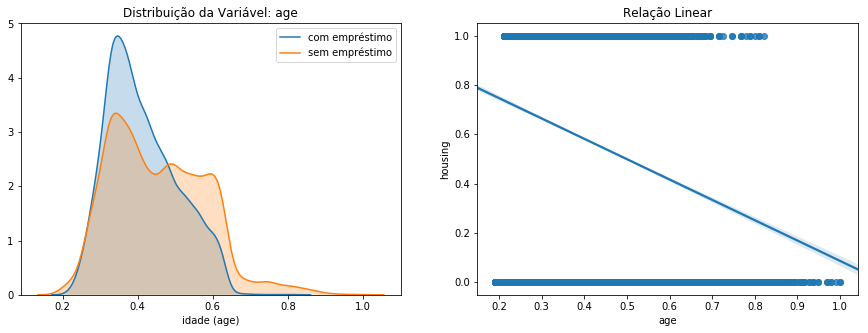

<Figure size 1080x360 with 0 Axes>

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)

fl = y == 1
kwargs = dict(bins=70, hist=False, kde_kws={'shade':True})

sns.distplot(x_norm.loc[fl, 'age'], label='com empréstimo', **kwargs)
sns.distplot(x_norm.loc[~fl, 'age'], label='sem empréstimo', **kwargs)
plt.title('Distribuição da Variável: age')
plt.xlabel('idade (age)')
plt.legend()

plt.subplot(1,2,2)
plt.title('Relação Linear')
sns.regplot(x_norm['age'], y)

plt.figure(figsize=(15,5))
plt.show()

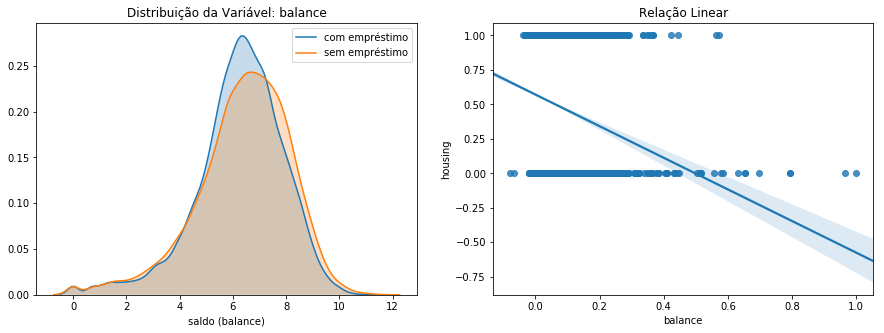

In [19]:
%%capture --no-display
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

fl = y == 1
kwargs = dict(bins=70, hist=False, kde_kws={'shade':True})

sns.distplot(np.log(x.loc[fl, 'balance']), label='com empréstimo', **kwargs)
sns.distplot(np.log(x.loc[~fl, 'balance']), label='sem empréstimo', **kwargs)
plt.title('Distribuição da Variável: balance')
plt.xlabel('saldo (balance)')
plt.legend()

plt.subplot(1,2,2)
plt.title('Relação Linear')
sns.regplot(x_norm['balance'], y)

plt.show()